<center><h1>Analyse de données avec la bibliothèque Pandas</h1></center>
<center><h1>Les DataFrame</h1></center>
<hr>

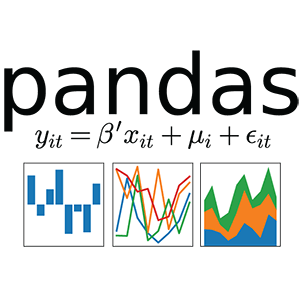

# I. Création de DataFrame
## 1. DataFrame à partir d'un dictionnaire

In [2]:

# Importation des bibliothèques
import pandas as pd
import numpy as np
# Création d'un dictionnaire
dico = {"height": [58,59,60,61,62,63,64,65,66,67,68,69,70,71,72],
        "weight":[115,117,120,123,126,129,132,135,139,142,146,150,154,159,164]
       }
# Création du dataframe
df = pd.DataFrame(dico)
# affichage
df # ou print(df)

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126
5,63,129
6,64,132
7,65,135
8,66,139
9,67,142


In [4]:
# Afficher les 5 premières lignes (observations)
df.head()

,height,weight
0,58,115
1,59,117
2,60,120
3,61,123
4,62,126


In [5]:
# Afficher les 2 premières lignes (observations)
df.head(2)

,height,weight
0,58,115
1,59,117


In [6]:
# Afficher les 5 dernières lignes (observations)
df.tail()

,height,weight
10,68,146
11,69,150
12,70,154
13,71,159
14,72,164


In [7]:
# Afficher les 3 dernières lignes (observations)
df.tail(3)

,height,weight
12,70,154
13,71,159
14,72,164


In [8]:
# Afficher toutes les valeurs du DataFrame
df.values

array([[ 58, 115],
       [ 59, 117],
       [ 60, 120],
       [ 61, 123],
       [ 62, 126],
       [ 63, 129],
       [ 64, 132],
       [ 65, 135],
       [ 66, 139],
       [ 67, 142],
       [ 68, 146],
       [ 69, 150],
       [ 70, 154],
       [ 71, 159],
       [ 72, 164]], dtype=int64)

In [9]:
# Afficher l'index : Index de lignes
df.index

RangeIndex(start=0, stop=15, step=1)

In [10]:
# Afficher les colonnes : Index des colonnes
df.columns

Index(['height', 'weight'], dtype='object')

###  a. importer une seule colonne

In [11]:
df = pd.DataFrame(dico, columns = ["weight"])
df.head(2)

,weight
0,115
1,117


### b. changer l'ordre des colonnes importé

In [12]:
df = pd.DataFrame(dico, columns = ["weight","height"])
df.head(2)

,weight,height
0,115,58
1,117,59


### c. importer dictionnaire avec colonne abscente

In [14]:
df = pd.DataFrame(dico, columns = ["weight","height","age"])
df.head()

,weight,height,age
0,115,58,NaN
1,117,59,NaN
2,120,60,NaN
3,123,61,NaN
4,126,62,NaN


## 2. Création dataframe à partir d'une série

In [16]:
s = pd.Series([1,4, -1, np.nan], index = ["a","b","c","d"])
df = pd.DataFrame(s, columns = ["nom_variable"])
df

,nom_variable
a,1.0
b,4.0
c,-1.0
d,NaN


## 3.Création DataFrame à partir d'une liste de dictionnaire

In [17]:
dico_1 = {
"Nom":"Pendragon",
"Prenom":"Arthur",
"Role":"Roi de Bretagne"
}
dico_2 = {
"Nom":"de Galles",
"Prenom":"Perceval",
"Role":"Chevalier du Pays de Galles"
}
df = pd.DataFrame([dico_1, dico_2])
df

,Nom,Prenom,Role
0,Pendragon,Arthur,Roi de Bretagne
1,de Galles,Perceval,Chevalier du Pays de Galles


## 4.Création DataFrame à partir d'un dictionnaire de série

In [6]:
import pandas as pd
# Deux dictionnaires pour créer des séries
dico_gdp = {
"France":2582501.31,
"USA":19390604.00,
"UK":2622433.96
}
dico_cpi = {
"France":0.2,
"UK":0.6,
"USA":1.3,
"Germany":0.5
}
# Créations des séries
s_gdp = pd.Series(dico_gdp)
s_cpi = pd.Series(dico_cpi)
# Création de dictionnaire de série
dico_de_series = {
"gdp": s_gdp,
"cpi": s_cpi
}
# Création du DataFrame
df = pd.DataFrame(dico_de_series)
df

,gdp,cpi
France,2582501.31,0.2
Germany,NaN,0.5
UK,2622433.96,0.6
USA,19390604.00,1.3


##  5.Création de DataFrame à partir d'un tableau à deux dimensions

In [9]:
import numpy as np
tab = np.random.randint(0,20,12).reshape(3,4)
df = pd.DataFrame(tab,columns=["a","b","c","d"])
df

,a,b,c,d
0,13,3,18,15
1,0,14,18,9
2,18,13,17,8


## 6. Importation de données
### a. Fichiers CSV

<b>Syntaxe : </b> <i>read_csv(chemin,skiprows,header,sep=",")</i>

La fonction read_csv admet plusieurs paramètres, on peut cité:

* <b> sep, delimiter :</b> séparateur de champs ;
* <b>decimal :</b> séparateur de décimales ;
* <b>header :</b> numéro(s) de ligne(s) à utiliser comme en-tête des données ;
* <b>skiprows :</b> numéro(s) de ligne(s) à sauter au début ;
* <b>skipfooter :</b> numéro(s) de ligne(s) à sauter à la ﬁn ;
* <b>nrows :</b> nombre de ligne à lire ;
* <b>na_values :</b> chaînes de caractères supplémentaires à considérer comme valeurs manquantes (en plus de #N/A, #N/A N/A, #NA, -1.#IND, -1.#QNAN, -NaN, -nan, 1.#IND,1.#QNAN, N/A, NA, NULL, NaN, n/a, nan, null) ;
* <b>quotechar :</b> caractère de quote ;
* <b>encoding :</b> encodage des caractères (défaut utf-8)..

In [46]:
chemin = "fichiers_exemples/chomage.csv"
chomage = pd.read_csv(chemin, decimal=";")
chomage

,region,departement,annee,ouvriers,ingenieurs
0,Bretagne,Cotes-d'Armor,2011,8738,1420
1,Bretagne,Finistere,2011,12701,2530
2,Bretagne,Ille-et-Vilaine,2011,11390,3986
3,Bretagne,Morbihan,2011,10228,2025
4,Corse,Corse-du-Sud,2011,975,259
5,Corse,Haute-Corse,2011,1297,254
6,Bretagne,Cotes-d'Armor,2010,8113,1334
7,Bretagne,Finistere,2010,12258,2401
8,Bretagne,Ille-et-Vilaine,2010,10897,3776
9,Bretagne,Morbihan,2010,9617,1979


# b. Fichiers xls

<b>Syntaxe : </b> <i>read_excel(chemin,skiprows,header,sheet_name)</i>

In [57]:
chemin = "./fichiers_exemples/chomage.xlsx"
chomage = pd.read_excel(chemin, skiprows=2, header=0, sheet_name = "Feuil 1")
chomage

,region,departement,annee,ouvriers,ingenieurs
0,Bretagne,Cotes-d'Armor,2011,8738,1420
1,Bretagne,Finistere,2011,12701,2530
2,Bretagne,Ille-et-Vilaine,2011,11390,3986
3,Bretagne,Morbihan,2011,10228,2025
4,Corse,Corse-du-Sud,2011,975,259
5,Corse,Haute-Corse,2011,1297,254
6,Bretagne,Cotes-d'Armor,2010,8113,1334
7,Bretagne,Finistere,2010,12258,2401
8,Bretagne,Ille-et-Vilaine,2010,10897,3776
9,Bretagne,Morbihan,2010,9617,1979


# II. Dimension de DataFrame

In [11]:
# Shape : Nombre de lignes et de colonne 
print("shape : ", df.shape)
# len : Nombre de lignes
print("Nombre de ligne :",len(df))
# len(df.columns) : Nombre de colonne
print("Nombre de colonnes : ", len(df.columns))

shape :  (3, 4)
Nombre de ligne : 3
Nombre de colonnes :  4


# III. Modification de l'index

In [12]:
df.index =["a","b","c"]
df.columns=["A","B","C","D"]
df

,A,B,C,D
a,13,3,18,15
b,0,14,18,9
c,18,13,17,8


# IV. Sélection
## 1. Extraction d'une ou plusieurs valeurs

In [13]:
dico = {"height": [58,59,60,61,62],
"weight": [115,117,120,123,126],
"age": [28,33,31,31,29],
"taille": [162,156,172,160,158],
}
df = pd.DataFrame(dico, index=["a","e","c","b","d"])
df

,height,weight,age,taille
a,58,115,28,162
e,59,117,33,156
c,60,120,31,172
b,61,123,31,160
d,62,126,29,158


In [22]:
df.iloc[1,3]

156

In [23]:
df.iloc[[0,2],[1,3]]

,weight,taille
a,115,162
c,120,172


In [25]:
df.iloc[0:2,0:2]

,height,weight
a,58,115
e,59,117


In [26]:
df.loc["b","taille"]

160

In [27]:
df.loc[["a","c"],["taille","weight"]]

,taille,weight
a,162,115
c,172,120


In [28]:
df.loc["a":"b","height":"age"]

,height,weight,age
a,58,115,28
e,59,117,33
c,60,120,31
b,61,123,31


## 2. Extraction d'une seule ligne

In [30]:
df.loc["e"]

height     59
weight    117
age        33
taille    156
Name: e, dtype: int64

In [31]:
df.iloc[0]

height     58
weight    115
age        28
taille    162
Name: a, dtype: int64

## 3. Extraction d'une seule colonne

In [33]:
df.loc[:,"taille"]

a    162
e    156
c    172
b    160
d    158
Name: taille, dtype: int64

In [34]:
df.iloc[:,1]

a    115
e    117
c    120
b    123
d    126
Name: weight, dtype: int64

## 4. Extraction de plusieurs lignes

In [35]:
df.loc["a":"b"]

,height,weight,age,taille
a,58,115,28,162
e,59,117,33,156
c,60,120,31,172
b,61,123,31,160


In [37]:
df.loc[["a","b"]]

,height,weight,age,taille
a,58,115,28,162
b,61,123,31,160


In [38]:
df.iloc[0:2]

,height,weight,age,taille
a,58,115,28,162
e,59,117,33,156


In [39]:
df.loc["a":"c"]

,height,weight,age,taille
a,58,115,28,162
e,59,117,33,156
c,60,120,31,172


## 5. Etraction de plusieurs colonnes

In [41]:
df.iloc[:,0:2]

,height,weight
a,58,115
e,59,117
c,60,120
b,61,123
d,62,126


In [42]:
df.loc[:,"age":"taille"]

,age,taille
a,28,162
e,33,156
c,31,172
b,31,160
d,29,158


In [43]:
df.iloc[:,[0,2]]

,height,age
a,58,28
e,59,33
c,60,31
b,61,31
d,62,29


In [44]:
df.loc[:,["height","age"]]

,height,age
a,58,28
e,59,33
c,60,31
b,61,31
d,62,29


## 6. Extraction avec un filtre

In [48]:
masque = df["taille"]>160
df.loc[masque]

,height,weight,age,taille
a,58,115,28,162
c,60,120,31,172


# V. Renommer les noms des colonnes

In [1]:
import pandas as pd
dico = {"height": [58,59,60,61,62],
"weight": [115,117,120,123,126],
"age": [28,33,31,31,29],
"taille": [162,156,172,160,158],
}
df = pd.DataFrame(dico)
df

,height,weight,age,taille
0,58,115,28,162
1,59,117,33,156
2,60,120,31,172
3,61,123,31,160
4,62,126,29,158


In [3]:
# Renommer les noms des colonnes
df.rename(columns={"weight":"masse","age":"annees"},inplace=True)
df

,height,masse,annees,taille
0,58,115,28,162
1,59,117,33,156
2,60,120,31,172
3,61,123,31,160
4,62,126,29,158


In [8]:
# Renommer les noms des lignes
df.rename(index={"0":"a","1":"b"},inplace=True)
df

,height,masse,annees,taille
a,58,115,28,162
b,59,117,33,156
2,60,120,31,172
3,61,123,31,160
4,62,126,29,158


# VI. Filtrage

In [11]:
# Création du masque
masque = df["annees"]<=30
print(masque)

a     True
b    False
2    False
3    False
4     True
Name: annees, dtype: bool


In [12]:
print(df[masque],'\n\n')
print(df.loc[masque])

   height  masse  annees  taille
a      58    115      28     162
4      62    126      29     158 


   height  masse  annees  taille
a      58    115      28     162
4      62    126      29     158


In [62]:
df.query("annees<30")

,height,masse,annees,taille
0,58,115,28,162
4,62,126,29,158


In [63]:
df.query("masse>120" and "height<62")

,height,masse,annees,taille
0,58,115,28,162
1,59,117,33,156
2,60,120,31,172
3,61,123,31,160


# VII. Valeurs manquantes

In [16]:
import numpy as np
dico = {"height": [58,59,60,61, np.nan],
"weight": [115,117,120,123,126],
"age": [28,33,31, np.nan,29],
"taille": [162,156,172,160,158],
}
df = pd.DataFrame(dico)
df

,height,weight,age,taille
0,58.0,115,28.0,162
1,59.0,117,33.0,156
2,60.0,120,31.0,172
3,61.0,123,NaN,160
4,NaN,126,29.0,158


## 1. Tester si une valeur est manquante

In [17]:
# Tester si une valeur est nulle dans le DataFrame
print(df.isnull())

   height  weight    age  taille
0   False   False  False   False
1   False   False  False   False
2   False   False  False   False
3   False   False   True   False
4    True   False  False   False


In [18]:
# Tester si une valeur est nulle dans une colonne
print(df["age"].isnull())

0    False
1    False
2    False
3     True
4    False
Name: age, dtype: bool


In [19]:
# Tester les valeurs non nulle
print(df.notnull())

   height  weight    age  taille
0    True    True   True    True
1    True    True   True    True
2    True    True   True    True
3    True    True  False    True
4   False    True   True    True


## 2. Retirer les observations avec valeurs manquantes

In [65]:
df.dropna()

,height,weight,age,taille
0,58.0,115,28.0,162
1,59.0,117,33.0,156
2,60.0,120,31.0,172


## 3. Remplacer les valeurs manquantes par une autre valeur 

In [66]:
df.fillna(-9999)

,height,weight,age,taille
0,58.0,115,28.0,162
1,59.0,117,33.0,156
2,60.0,120,31.0,172
3,61.0,123,-9999.0,160
4,-9999.0,126,29.0,158


# VII. Suppressions de lignes et de colonnes

## 1. Supprimer une ligne

In [68]:
# Supprimer la première ligne
df.drop(0)

,height,weight,age,taille
1,59.0,117,33.0,156
2,60.0,120,31.0,172
3,61.0,123,NaN,160
4,NaN,126,29.0,158


<b> RQ : </b> Si on a un dataframe dont l'index est de type str, et on veut utiliser l'indexation numérique alors on utilise l'attribut <b>index[label]</b> pour déterminer le numéro de la ligne

In [22]:
# Création d'un DataFrame avec index de type str
df2 = pd.DataFrame(dico,index=list("abcde"))
print(df2)

   height  weight   age  taille
a    58.0     115  28.0     162
b    59.0     117  33.0     156
c    60.0     120  31.0     172
d    61.0     123   NaN     160
e     NaN     126  29.0     158


In [24]:
# Chercher le label de la ligne
pos = df2.index[0]
# Supprimer la ligne
df2.drop(pos)

,height,weight,age,taille
b,59.0,117,33.0,156
c,60.0,120,31.0,172
d,61.0,123,NaN,160
e,NaN,126,29.0,158


In [25]:
df2.drop("b")

,height,weight,age,taille
a,58.0,115,28.0,162
c,60.0,120,31.0,172
d,61.0,123,NaN,160
e,NaN,126,29.0,158


## 2. Supprimer plusieurs lignes

In [20]:
df.drop([0,2])

,height,weight,age,taille
1,59.0,117,33.0,156
3,61.0,123,NaN,160
4,NaN,126,29.0,158


In [22]:
df2.drop(["c","e"])

,height,weight,age,taille
a,58.0,115,28.0,162
b,59.0,117,33.0,156
d,61.0,123,NaN,160


## 3. Supprimer une colonne/Plusieurs colonnes

In [25]:
df.drop("height", axis=1)

,weight,age,taille
0,115,28.0,162
1,117,33.0,156
2,120,31.0,172
3,123,NaN,160
4,126,29.0,158


In [26]:
df.drop(["height","taille"],axis=1)

,weight,age
0,115,28.0
1,117,33.0
2,120,31.0
3,123,NaN
4,126,29.0


# VIII.  Ajout de valeurs

In [4]:
dico = {"ville": ["Marseille","Aix",
"Marseille","Aix","Paris","Paris"],
"annee": [2019,2019,2018,2018,2019,2019],
"x": [1,2,2,2,0,0],
"y": [3,3,2,1,4,4],
}
df = pd.DataFrame(dico)
df

,ville,annee,x,y
0,Marseille,2019,1,3
1,Aix,2019,2,3
2,Marseille,2018,2,2
3,Aix,2018,2,1
4,Paris,2019,0,4
5,Paris,2019,0,4


## 1. Ajout d'une ligne

In [5]:
# Création d'une ligne
nv_ligne = pd.DataFrame([["Tunis","2021",2,4]],columns = df.columns)
nv_ligne

,ville,annee,x,y
0,Tunis,2021,2,4


In [30]:
# Ajout de la ligne 
df = df.append(nv_ligne, ignore_index=True)
df

,ville,annee,x,y
0,Marseille,2019,1,3
1,Aix,2019,2,3
2,Marseille,2018,2,2
3,Aix,2018,2,1
4,Paris,2019,0,4
5,Paris,2019,0,4
6,Tunis,2021,2,4


## 2. Ajout de plusieurs lignes

In [31]:
# Créations des lignes
nv_lignes = pd.DataFrame([["Sousse","2022",2,4],["Kasserine","2022",3,3]],columns = df.columns)
nv_lignes

,ville,annee,x,y
0,Sousse,2022,2,4
1,Kasserine,2022,3,3


In [35]:
# Ajout des nouveaux lignes
df = df.append(nv_lignes,ignore_index=True)
df

,ville,annee,x,y
0,Marseille,2019,1,3
1,Aix,2019,2,3
2,Marseille,2018,2,2
3,Aix,2018,2,1
4,Paris,2019,0,4
5,Paris,2019,0,4
6,Sousse,2022,2,4
7,Kasserine,2022,3,3


## 3. Ajout de colonne

In [37]:
df["z"] = np.arange(len(df))
df

,ville,annee,x,y,z
0,Marseille,2019,1,3,0
1,Aix,2019,2,3,1
2,Marseille,2018,2,2,2
3,Aix,2018,2,1,3
4,Paris,2019,0,4,4
5,Paris,2019,0,4,5
6,Sousse,2022,2,4,6
7,Kasserine,2022,3,3,7


# IX. Retrait des valeurs dupliqués

In [61]:
dico = {"ville": ["Marseille","Aix",
"Marseille","Aix","Paris","Paris"],
"annee": [2019,2019,2018,2018,2019,2019],
"x": [1,2,2,2,0,0],
"y": [3,3,2,1,4,4],
}
df = pd.DataFrame(dico)
df

,ville,annee,x,y
0,Marseille,2019,1,3
1,Aix,2019,2,3
2,Marseille,2018,2,2
3,Aix,2018,2,1
4,Paris,2019,0,4
5,Paris,2019,0,4


In [47]:
df.drop_duplicates(inplace=True)
df

,ville,annee,x,y
0,Marseille,2019,1,3
1,Aix,2019,2,3
2,Marseille,2018,2,2
3,Aix,2018,2,1
4,Paris,2019,0,4


In [50]:
df.drop_duplicates(keep="last",inplace=True)
df

,ville,annee,x,y
0,Marseille,2019,1,3
1,Aix,2019,2,3
2,Marseille,2018,2,2
3,Aix,2018,2,1
4,Paris,2019,0,4


In [59]:
df.drop_duplicates(subset = ["ville"], keep = "first",inplace=True)
df

,ville,annee,x,y
0,Marseille,2019,1,3
1,Aix,2019,2,3
4,Paris,2019,0,4


In [63]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [64]:
df.duplicated(subset=["ville"])

0    False
1    False
2     True
3     True
4    False
5     True
dtype: bool

In [2]:
import pandas as pd
import numpy as np
dico = {"ville": ["Marseille","Aix",
"Marseille","Aix","Paris","Paris"],
"annee": [2019,2019,2018,2018,2019,2019],
"x": [1,2,2,2,0,0],
"y": [3,3,2,1,4,4],
}
df = pd.DataFrame(dico)

In [3]:
df.duplicated(subset=["ville"]).any()

True

# X. Création de nouvelles colonnes

In [4]:
dico = {"height":
[58,59,60,61,62,
63,64,65,66,67,
68,69,70,71,72],
"weight":
[115,117,120,123,126,
129,132,135,139,142,
146,150,154,159,164]
}
df = pd.DataFrame(dico)

In [5]:
# Création d'une nouvelle colonne calculée
df["height2"]=df["height"]**2
df

,height,weight,height2
0,58,115,3364
1,59,117,3481
2,60,120,3600
3,61,123,3721
4,62,126,3844
5,63,129,3969
6,64,132,4096
7,65,135,4225
8,66,139,4356
9,67,142,4489


# XI. Fonction statistiques

In [8]:
dico = {"height": [58,59,60,61,62],
"weight": [115,117,120,123,126],
"age": [28,33,31,31,29],
"taille": [162,156,172,160,158],
"married": [True,True,False,False,True],
"city": ["A","B","B","B","A"]
}
df = pd.DataFrame(dico)

## 1. Calcul par colonne

In [7]:
# Calculer la moyenne par colonne
df.mean()

height      60.0
weight     120.2
age         30.4
taille     161.6
married      0.6
dtype: float64

In [7]:
# Chercher la valeur maximale par colonne
df.max()

height       62
weight      126
age          33
taille      172
married    True
city          B
dtype: object

In [9]:
# Chercher la valeur minimale sur la colonne
df.age.min()

28

In [11]:
# Chercher l'indice de l'élément maximal sur une colonne
df.age.idxmax()

1

## 2. Calcul par ligne

In [8]:
# Chercher la valeur maximale par ligne
df.mean(axis=1)

0    72.8
1    73.2
2    76.6
3    75.0
4    75.2
dtype: float64

# XII. Tri

<b>Syntaxe : </b> <i><b>DataFrame.sort_values(by, axis=0, ascending=True,inplace=False, kind="quicksort",na_position="last")</b></i>

Avec :
* by = Label(s) de(s) colonne suivant(s) la(les) quelle(s) se fait le tri
* axis =
    - 0 (par défaut): tri par ligne
    - 1 : Tri par colonne
* Ascending =
    - True (par défaut) : Tri décroissant
    - False : Tri décroissant
* inplace = 
    - False (par défaut) : retourné une vue triée
    - True : trier la série sur place
* kind =
    - quicksort (par défaut) : Tri rapide
    - mergesort :Tri fusin
    - heapsort : Tri par tas
* na_position =
    - last : les valeurs NaN seront à la fin de la série
    - first : les valeurs NaN seront au début de la série

In [21]:
import numpy as np
dico = {"height": [58,59,60,61,62],
"weight": [115, np.nan,120,123,126],
"age": [28,33,31,31,29],
"taille": [162,156,172,160,158],
"married": [True,True, np.nan,False,True],
"city": ["A","B","B","B","A"]
}
df = pd.DataFrame(dico)
df

,height,weight,age,taille,married,city
0,58,115.0,28,162,True,A
1,59,NaN,33,156,True,B
2,60,120.0,31,172,NaN,B
3,61,123.0,31,160,False,B
4,62,126.0,29,158,True,A


In [22]:
# Trier par colonne height dans un ordre décroissant
df.sort_values(by="height", ascending=False)

,height,weight,age,taille,married,city
4,62,126.0,29,158,True,A
3,61,123.0,31,160,False,B
2,60,120.0,31,172,NaN,B
1,59,NaN,33,156,True,B
0,58,115.0,28,162,True,A


In [23]:
# Trier par colonne taille dans un ordre décroissant
df.sort_values(by="taille", ascending=False)

,height,weight,age,taille,married,city
2,60,120.0,31,172,NaN,B
0,58,115.0,28,162,True,A
3,61,123.0,31,160,False,B
4,62,126.0,29,158,True,A
1,59,NaN,33,156,True,B


In [25]:
# Tri par colonne married et les valeurs NAN seront au début
df.sort_values(by="married", ascending=False, na_position="first")

,height,weight,age,taille,married,city
2,60,120.0,31,172,NaN,B
0,58,115.0,28,162,True,A
1,59,NaN,33,156,True,B
4,62,126.0,29,158,True,A
3,61,123.0,31,160,False,B


In [18]:
# Tri croissant par colonne married et décroissant par colonne weight
df.sort_values(by=["married","weight"],ascending=[True,False],na_position="first")

,height,weight,age,taille,married,city
2,60,120.0,31,172,NaN,B
3,61,123.0,31,160,False,B
1,59,NaN,33,156,True,B
4,62,126.0,29,158,True,A
0,58,115.0,28,162,True,A


# XIII. Concatiner deux dataFrame

In [19]:
import numpy as np
x_1 = pd.DataFrame(np.random.randn(5,4),columns=["a","b","c","d"])
x_2 = pd.DataFrame(np.random.randn(5,2),columns = ["e","f"])
x_1

,a,b,c,d
0,-1.516032,0.230872,-1.429457,-0.891153
1,0.868481,-0.615579,0.965021,0.344001
2,-0.712518,-1.535629,-1.196807,-0.180300
3,-0.998786,-0.966341,-0.030866,0.290037
4,1.556868,1.180493,0.881825,0.018925


In [20]:
x_2

,e,f
0,1.422049,-0.024735
1,0.629022,0.166484
2,0.290155,1.100612
3,-0.677269,-1.111241
4,-0.417467,0.366847


# 1. Concatiner en colonne (une à droite et l'autre à gauche)
<b> Syntaxe : </b> concat([liste de Dataframe], axis = 1)

In [21]:
pd.concat([x_1,x_2],axis=1)

,a,b,c,d,e,f
0,-1.516032,0.230872,-1.429457,-0.891153,1.422049,-0.024735
1,0.868481,-0.615579,0.965021,0.344001,0.629022,0.166484
2,-0.712518,-1.535629,-1.196807,-0.180300,0.290155,1.100612
3,-0.998786,-0.966341,-0.030866,0.290037,-0.677269,-1.111241
4,1.556868,1.180493,0.881825,0.018925,-0.417467,0.366847


In [24]:
x_3 = pd.DataFrame(np.random.randn(3,2),columns = ["e","f"])
x_3

,e,f
0,-0.357502,0.603786
1,0.241396,0.194925
2,0.017433,-1.795548


# 2. Concatiner les lignes (une en haut et l'autre en bas)
<b>Syntaxe : concat(liste DataFrame, axis=0)</b>

In [25]:
pd.concat([x_2,x_3],axis=0)

,e,f
0,1.422049,-0.024735
1,0.629022,0.166484
2,0.290155,1.100612
3,-0.677269,-1.111241
4,-0.417467,0.366847
0,-0.357502,0.603786
1,0.241396,0.194925
2,0.017433,-1.795548


In [26]:
pd.concat([x_2,x_3],axis=0,ignore_index=True)

,e,f
0,1.422049,-0.024735
1,0.629022,0.166484
2,0.290155,1.100612
3,-0.677269,-1.111241
4,-0.417467,0.366847
5,-0.357502,0.603786
6,0.241396,0.194925
7,0.017433,-1.795548


# XIV. Jointures

In [30]:
exportations_fr = pd.DataFrame(
{"country":"France",
"year": np.arange(2014,2017),
"exportations": [816.8192172,851.6632573,867.4014253]
})

exportations_tunisie = pd.DataFrame(
{"country":"Tunisie",
"year": np.arange(2015,2018),
"exportations": [35.50207915,37.45996653,39.38228396]})

importations_fr = pd.DataFrame(
{"country":"France",
"year": np.arange(2015,2018),
"importations": [898.5242962,936.3691166,973.8762149]
})

importations_tunisie = pd.DataFrame(
{"country":"Tunisie",
"year": np.arange(2015,2018),
"importations": [46.39884177,53.52375588,56.68165748]
})

In [31]:
exportation = pd.concat([exportations_fr,exportations_tunisie],ignore_index=True)

In [32]:
exportation

,country,year,exportations
0,France,2014,816.819217
1,France,2015,851.663257
2,France,2016,867.401425
3,Tunisie,2015,35.502079
4,Tunisie,2016,37.459967
5,Tunisie,2017,39.382284


In [34]:
importation= pd.concat([importations_fr,importations_tunisie],ignore_index=True)
importation

,country,year,importations
0,France,2015,898.524296
1,France,2016,936.369117
2,France,2017,973.876215
3,Tunisie,2015,46.398842
4,Tunisie,2016,53.523756
5,Tunisie,2017,56.681657


Si on désire changer le type de jointure, on peut modifier la valeur du paramètre <b>how</b> de la fonction <b>merge()</b>, pour lui donner une des valeurs suivantes :

* <b>left :</b> toutes les lignes de x, et toutes les colonnes de x et y. Les lignes dans x pour lesquelles il n’y a pas de correspondance dans y auront des valeurs NaN dans les nouvelles colonnes. S’il y a plusieurs correspondances dans les noms entre x et y, toutes les combinaisons sont retournées ;
* <b>inner : (par défaut)</b> toutes les lignes de x pour lesquelles il y a des valeurs correspondantes dans y, et toutes les colonnes de x et y. S’il y a plusieurs correspondances dans les noms entre x et y, toutes les combinaisons possibles sont retournées ;
* <b>right :</b> toutes les lignes de y, et toutes les colonnes de y et x. Les lignes dans y pour lesquelles il n’y a pas de correspondance dans x auront des valeurs NaN dans les nouvelles colonnes. S’il y a plusieurs correspondances dans les noms entre y et x, toutes les combinaisons sont retournées ;
* <b>outer :</b> toutes les lignes de x et de y, et toutes les colonnes de x et y. Les lignes de x pour lesquelles il n’y a pas de correspondance dabs y et celles de y pour lesquelles il n’y a pas de correspondance dans x auront des valeurs NaN.

In [35]:
pd.merge(left=exportation,right=importation)

,country,year,exportations,importations
0,France,2015,851.663257,898.524296
1,France,2016,867.401425,936.369117
2,Tunisie,2015,35.502079,46.398842
3,Tunisie,2016,37.459967,53.523756
4,Tunisie,2017,39.382284,56.681657


In [36]:
pd.merge(left = importation, right = exportation, how="left")

,country,year,importations,exportations
0,France,2015,898.524296,851.663257
1,France,2016,936.369117,867.401425
2,France,2017,973.876215,NaN
3,Tunisie,2015,46.398842,35.502079
4,Tunisie,2016,53.523756,37.459967
5,Tunisie,2017,56.681657,39.382284


In [38]:
pd.merge(left = importation, right = exportation, how="right")

,country,year,importations,exportations
0,France,2015,898.524296,851.663257
1,France,2016,936.369117,867.401425
2,Tunisie,2015,46.398842,35.502079
3,Tunisie,2016,53.523756,37.459967
4,Tunisie,2017,56.681657,39.382284
5,France,2014,NaN,816.819217


In [39]:
pd.merge(left = importation, right = exportation, how="outer")

,country,year,importations,exportations
0,France,2015,898.524296,851.663257
1,France,2016,936.369117,867.401425
2,France,2017,973.876215,NaN
3,Tunisie,2015,46.398842,35.502079
4,Tunisie,2016,53.523756,37.459967
5,Tunisie,2017,56.681657,39.382284
6,France,2014,NaN,816.819217


# XV. Agrégation : Regroupement

In [40]:
chomage = pd.DataFrame(
{"region": (["Bretagne"]*4 + ["Corse"]*2)*2,
"departement": ["Cotes-d'Armor","Finistere","Ille-et-Vilaine","Morbihan","Corse-du-Sud","Haute-Corse"]*2,
"annee": np.repeat([2011,2010],6),
"ouvriers": [8738,12701,11390,10228,975,1297,8113,12258,10897,9617,936,1220],
"ingenieurs": [1420,2530,3986,2025,259,254,1334,2401,3776,1979,253,241]
})
chomage

,region,departement,annee,ouvriers,ingenieurs
0,Bretagne,Cotes-d'Armor,2011,8738,1420
1,Bretagne,Finistere,2011,12701,2530
2,Bretagne,Ille-et-Vilaine,2011,11390,3986
3,Bretagne,Morbihan,2011,10228,2025
4,Corse,Corse-du-Sud,2011,975,259
5,Corse,Haute-Corse,2011,1297,254
6,Bretagne,Cotes-d'Armor,2010,8113,1334
7,Bretagne,Finistere,2010,12258,2401
8,Bretagne,Ille-et-Vilaine,2010,10897,3776
9,Bretagne,Morbihan,2010,9617,1979


## 1. Regroupement selon les valeurs d'une seule colonne

In [51]:
# Total des ouvriers par année
chomage.groupby("annee")["ouvriers"].sum()

annee
2010    43041
2011    45329
Name: ouvriers, dtype: int64

In [58]:
# Total des ouvriers par année
chomage.loc[:,["annee","ouvriers"]].groupby("annee").sum()

,ouvriers
annee,
2010,43041
2011,45329


In [52]:
# Total des ouvriers et des ingénieurs par année
chomage.loc[:,["annee","ouvriers","ingenieurs"]].groupby("annee").sum()

,ouvriers,ingenieurs
annee,,
2010,43041,9984
2011,45329,10474


## 2. Regroupement selon les valeurs de plusieurs colonnes

In [59]:
# Total des ouvriers et des ingenieurs selon l'annee et la région
chomage.loc[:,["annee","region","ouvriers","ingenieurs"]].groupby(["annee","region"]).sum()

ouvriers  ingenieurs
annee region                        
2010  Bretagne     40885        9490
      Corse         2156         494
2011  Bretagne     43057        9961
      Corse         2272         513